# Common Base Work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
random.seed(1)

In [2]:
train_1 = open("dataset1_training.txt", "r")
train_2 = open("dataset2_training.txt", "r")
test_1 = open("dataset1_testing.txt", "r")
test_2 = open("dataset2_testing.txt", "r")
train_1_data = train_1.readlines()
train_2_data = train_2.readlines()
test_1_data = test_1.readlines()
test_2_data = test_2.readlines()
train1 = []
train2 = []
for each in range(len(train_1_data)):
    train_1_data[each] = train_1_data[each].lstrip().split()
    train1.append([float(train_1_data[each][0]), float(train_1_data[each][1]), int(train_1_data[each][2])])
for each in range(len(train_2_data)):
    train_2_data[each] = train_2_data[each].lstrip().split()
    train2.append([float(train_2_data[each][0]), float(train_2_data[each][1]), int(train_2_data[each][2])])
test1 = []
test2 = []
for each in range(len(test_1_data)):
    test_1_data[each] = test_1_data[each].lstrip().split()
    test1.append([float(test_1_data[each][0]), float(test_1_data[each][1]), int(test_1_data[each][2])])
for each in range(len(test_1_data)):
    test_2_data[each] = test_2_data[each].lstrip().split()
    test2.append([float(test_2_data[each][0]), float(test_2_data[each][1]), int(test_2_data[each][2])])

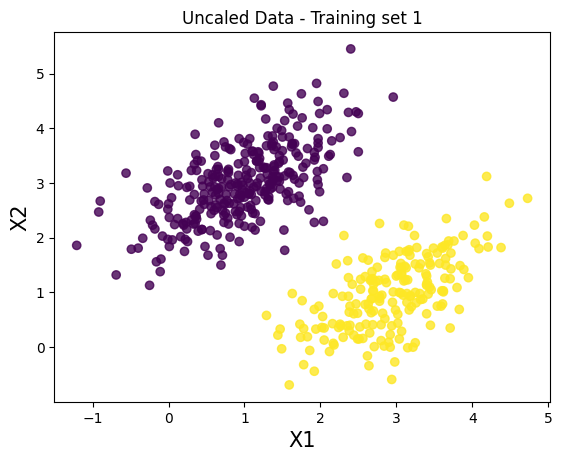

In [3]:
train1 = np.array(train1)
train2 = np.array(train2)
test1 = np.array(test1)
test2 = np.array(test2)
plt.title("Uncaled Data - Training set 1")
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.scatter(train1[:, 0], train1[:, 1], c=train1[:,2:], alpha=0.8)

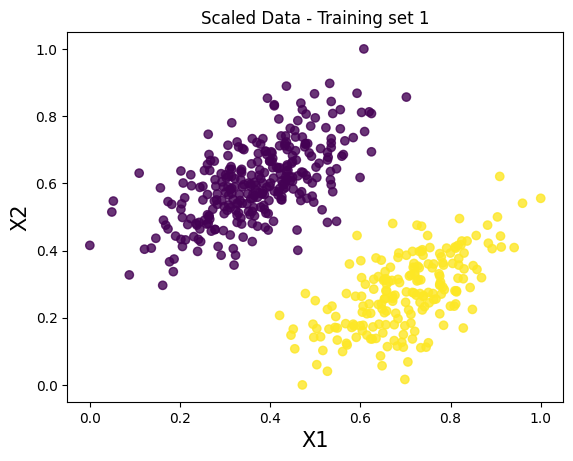

In [4]:
mod_scale = MinMaxScaler()
scale_res=mod_scale.fit_transform(train1[:,:2])
plt.title("Scaled Data - Training set 1")
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.scatter(scale_res[:, 0], scale_res[:, 1], c=train1[:,2:], alpha=0.8)

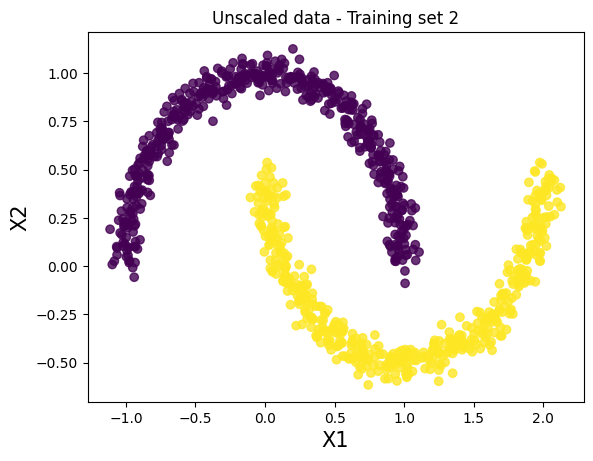

In [5]:
plt.title("Unscaled data - Training set 2")
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.scatter(train2[:, 0], train2[:, 1], c=train2[:,2:], alpha=0.8)

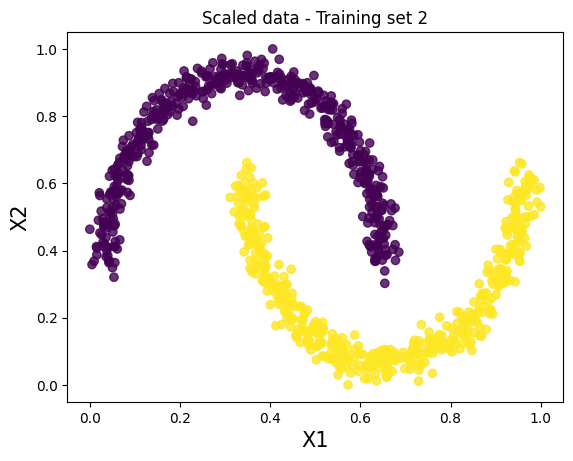

In [6]:
mod_scale_2 = MinMaxScaler()
scale_res_2 = mod_scale_2.fit_transform(train2[:,:2])
plt.title("Scaled data - Training set 2")
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.scatter(scale_res_2[:, 0], scale_res_2[:, 1], c=train2[:,2:], alpha=0.8)

# Problem 1

In [7]:
# Here, we are going to initialize the neural network, by adding random numbers between 0 and 1 for every hidden and output layers, based on the hidden nodes and output nodes
def initial_network(inputs, hidden, outputs):
    network = []
    hidden_l = [{'weights':[random.random() for each in range(inputs+1)]} for each in range(hidden)]
    network.append(hidden_l)
    output_l = [{'weights':[random.random() for each in range(hidden+1)]} for each in range(outputs)]
    network.append(output_l)
    return network

# Now, we are going to calculate neuron activation for the input
def activate(weights, num_inputs):
    activation = weights[-1]
    for ind in range(len(weights)-1):
        activation += weights[ind] * num_inputs[ind]
    return activation

# This is the transfer neuron activation
def transfer(activation):
    return 1.0/(1.0 + math.exp(-activation))

# Calculate rate of change of neuron input
def transfer_derivative(res):
    return res-res*res

# Forward propogation to send input to the output layer
def forward_propogate(nwork, rec):
    inps = rec
    for layer in nwork:
        new_inps = []
        for neuron in layer:
            activation = activate(neuron['weights'], inps)
            neuron['output'] = transfer(activation)
            new_inps.append(neuron['output'])
        inps = new_inps
    return inps

# Now, we gonna backpropogate error and store it in the neurons
def backward_propogate_error(nwork, expect):
    for ind in range(len(nwork)-1, -1, -1):
        layer = nwork[ind]
        errors = []
        if ind != len(nwork)-1:
            for each in range(len(layer)):
                error = 0
                for neuron in nwork[ind+1]:
                    error += (neuron['weights'][each] * neuron['delta'])
                errors.append(error)
        else:
            for each in range(len(layer)):
                neuron = layer[each]
                errors.append(neuron['output'] - expect[each])
        for each in range(len(layer)):
            neuron = layer[each]
            neuron['delta'] = errors[each] * transfer_derivative(neuron['output'])

# update network weights
def upd_weights(nwork, row, learn):
    for ind in range(len(nwork)):
        inps = row[:-1]
        if ind > 0:
            inps = [neuron['output'] for neuron in nwork[ind - 1]]
        for neuron in nwork[ind]:
            for each in range(len(inps)):
                neuron['weights'][each] -= learn * neuron['delta']*inps[each]
            neuron['weights'][-1] -= learn * neuron['delta']

# Finally, time to train the network
def train(nwork, train, learn, epochs, outs):
    for epoch in range(1, epochs+1):
        tot_err = 0
        for row in train:
            out = forward_propogate(nwork, row)
            expc = [0 for ind in range(outs)]
            expc[int(row[-1])] = 1
            tot_err += sum([math.pow((expc[ind]-out[ind]), 2) for ind in range(len(expc))])
            backward_propogate_error(nwork, expc)
            upd_weights(nwork, row, learn)
        print(f"-->epoch:{epoch}, learning rate={learn}, error={tot_err}")

# Make prediction with the network
def predict(nwork, row):
    outputs = forward_propogate(nwork, row)
    return outputs.index(max(outputs))

In [8]:
# Training set 2
hidden = 4
learning = 0.8
epochs = 200
num_inputs = len(train2[0]) - 1
num_outputs = len(set([each[-1] for each in train2]))
network_new = initial_network(num_inputs, hidden, num_outputs)
print(network_new)
train(network_new, train2, learning, epochs, num_outputs)
for each in network_new:
    print(each)

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}, {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}, {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}], [{'weights': [0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265]}, {'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966]}]]
-->epoch:1, learning rate=0.8, error=217.36039452289336
-->epoch:2, learning rate=0.8, error=168.31901008500145
-->epoch:3, learning rate=0.8, error=166.39791035697445
-->epoch:4, learning rate=0.8, error=164.3543227469681
-->epoch:5, learning rate=0.8, error=162.82913804615598
-->epoch:6, learning rate=0.8, error=161.76619453385
-->epoch:7, learning rate=0.8, error=160.96678072811167
-->epoch:8, learning rate=0.8, error=160.31645845968777
-->epoch:9, le

In [9]:
# Training set 1
hidden = 4
learning = 0.8
epochs = 200
num_inps = len(train1[0]) - 1
num_outs = len(set([each[-1] for each in train1]))
network = initial_network(num_inps, hidden, num_outs)
print(network)
train(network, train1, learning, epochs, num_outs)
for each in network:
    print(each)

[[{'weights': [0.9391491627785106, 0.38120423768821243, 0.21659939713061338]}, {'weights': [0.4221165755827173, 0.029040787574867943, 0.22169166627303505]}, {'weights': [0.43788759365057206, 0.49581224138185065, 0.23308445025757263]}, {'weights': [0.2308665415409843, 0.2187810373376886, 0.4596034657377336]}], [{'weights': [0.28978161459048557, 0.021489705265908876, 0.8375779756625729, 0.5564543226524334, 0.6422943629324456]}, {'weights': [0.1859062658947177, 0.9925434121760651, 0.8599465287952899, 0.12088995980580641, 0.3326951853601291]}]]
-->epoch:1, learning rate=0.8, error=34.9055221633908
-->epoch:2, learning rate=0.8, error=20.835766614493966
-->epoch:3, learning rate=0.8, error=6.0116667366637495
-->epoch:4, learning rate=0.8, error=2.5748501172175065
-->epoch:5, learning rate=0.8, error=1.6237134787359262
-->epoch:6, learning rate=0.8, error=1.232020435002466
-->epoch:7, learning rate=0.8, error=1.0353071686724757
-->epoch:8, learning rate=0.8, error=0.9097130886878806
-->epoch

In [10]:
total = 0
preds = 0
tester = test1
for entry in tester:
    total += 1
    predicted = predict(network, entry)
    print(f"Expected:{entry[-1]}, Predicted={predicted}")
    if int(entry[-1]) == predicted:
        preds += 1
print(f"Accuracy = {100*preds/total}%")

Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0

In [11]:
total = 0
preds = 0
tester = test2
for entry in tester:
    total += 1
    predicted = predict(network_new, entry)
    print(f"Expected:{entry[-1]}, Predicted={predicted}")
    if int(entry[-1]) == predicted:
        preds += 1
print(f"Accuracy = {100*preds/total}%")

Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0, Predicted=0
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:1.0, Predicted=1
Expected:0.0

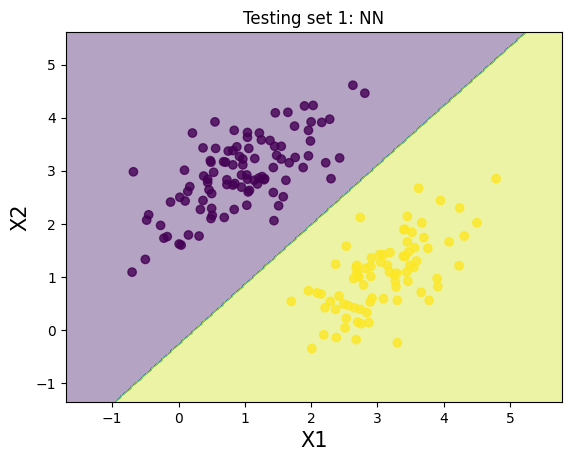

In [12]:
x=np.array(test1)[:,:2]
y=np.array(test1)[:,2:].flatten()
reduced_data = x
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
res = np.array([np.argmax(forward_propogate(network,k)) for k in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
plt.contourf(xx, yy, res, alpha=0.4)
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.title("Testing set 1: NN")
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)

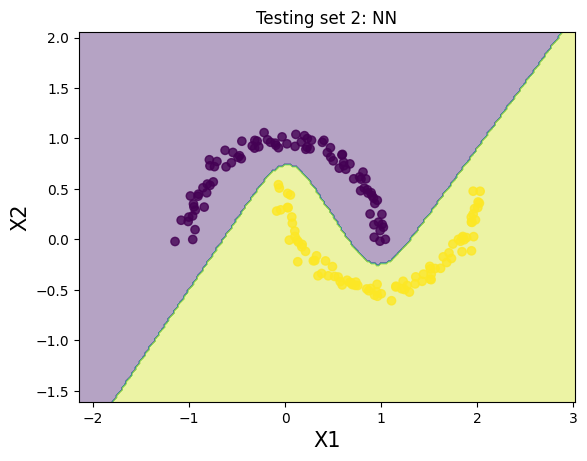

In [13]:
x=np.array(test2)[:,:2]
y=np.array(test2)[:,2:].flatten()
reduced_data = x
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
res = np.array([np.argmax(forward_propogate(network_new,k)) for k in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
plt.contourf(xx, yy, res, alpha=0.4)
plt.title("Testing set 2: NN")
plt.xlabel("X1",fontsize=15)
plt.ylabel("X2",fontsize=15)
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)

# Problem 2

In [14]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(train1[:, :2], np.ravel(train1[:, 2:]))
pred = linear_svm.predict(test1[:, :2])
print(f"Accuracy: {100*metrics.accuracy_score(test1[:, 2:], pred)}%")
print(f"Recall: {100*metrics.recall_score(test1[:, 2:], pred)}%")
print(f"Precision: {100*metrics.precision_score(test1[:, 2:], pred)}%")

Accuracy: 100.0%
Recall: 100.0%
Precision: 100.0%


In [15]:
rbf_svm2 = svm.SVC(kernel='rbf')
rbf_svm2.fit(train2[:, :2], np.ravel(train2[:, 2:]))
pred2 = rbf_svm2.predict(test2[:, :2])
print(f"Accuracy: {100*metrics.accuracy_score(test2[:, 2:], pred2)}%")
print(f"Recall: {100*metrics.recall_score(test2[:, 2:], pred2)}%")
print(f"Precision: {100*metrics.precision_score(test2[:, 2:], pred2)}%")

Accuracy: 100.0%
Recall: 100.0%
Precision: 100.0%


In [16]:
# They come in handy for setting the base for plots
def meshgrid(x, y, h):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model, xx, yy, **params):
    res = model.predict(np.c_[xx.ravel(), yy.ravel()])
    res = res.reshape(xx.shape)
    out = ax.contourf(xx, yy, res, **params)
    return out

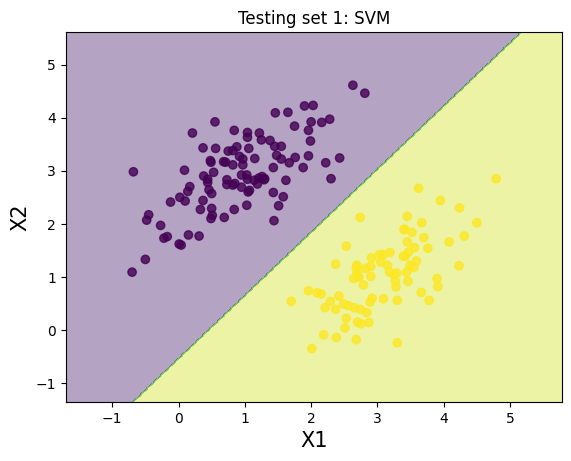

In [17]:
x = test1[:, :2]
y = np.ravel(test1[:, 2:])
linear = svm.SVC(kernel='linear')
mod = linear.fit(x, y)
fig, ax = plt.subplots()
xx, yy = meshgrid(x[:, 0], x[:, 1], 0.02)
plot_contours(ax, mod, xx, yy, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)
ax.set_title("Testing set 1: SVM")
ax.set_xlabel("X1",fontsize=15)
ax.set_ylabel("X2",fontsize=15)
plt.show()

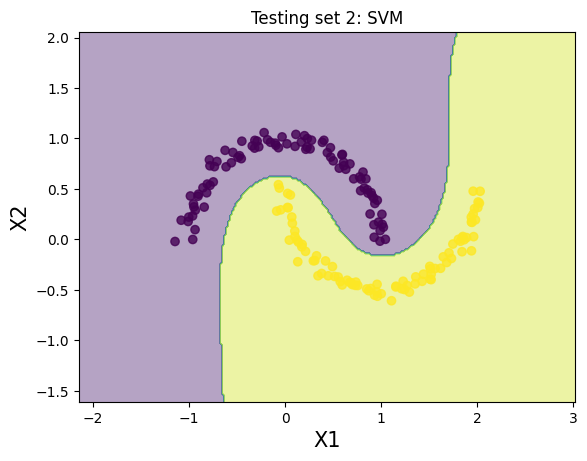

In [18]:
x = test2[:, :2]
y = np.ravel(test2[:, 2:])
kernel = svm.SVC(kernel='rbf')
mod = kernel.fit(x, y)
fig, ax = plt.subplots()
xx, yy = meshgrid(x[:, 0], x[:, 1], 0.02)
plot_contours(ax, mod, xx, yy, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)
ax.set_title("Testing set 2: SVM")
ax.set_xlabel("X1",fontsize=15)
ax.set_ylabel("X2",fontsize=15)
plt.show()